In [21]:
from preprocess.clean import lowering, removeEmojis, removeHTMLTags, removePuncFast, removeURLs, removeStopwords
from preprocess.semantic import tokenisation, stemming

from assignments.movie_api import getJsonDescription
import matplotlib.pyplot as plt # type: ignore
import numpy as np

In [24]:
tokens = getJsonDescription()

sample_after = tokens[:20]
sample_before = tokens[:20]

In [25]:
for i in range(len(sample_after)):
    sample_after[i] = removeEmojis(sample_after[i])
    sample_after[i] = removeHTMLTags(sample_after[i])
    sample_after[i] = removePuncFast(sample_after[i])
    sample_after[i] = removeURLs(sample_after[i])
    sample_after[i] = removeStopwords(sample_after[i])
    sample_after[i] = lowering(sample_after[i])
    # print(sam)

# print(sample_after)

tokens = tokenisation(sample_after)

for i in range(len(tokens)):
    stemmedList = stemming(tokens[i])
    tokens[i] = stemmedList

print(sample_before[14])
print(tokens[14])

A man with a low IQ has accomplished great things in his life and been present during significant historic events—in each case, far exceeding what anyone imagined he could do. But despite all he has achieved, his one true love eludes him.
['a', 'man', 'low', 'iq', 'accomplish', 'great', 'thing', 'life', 'present', 'signific', 'histor', 'events—in', 'case', 'far', 'exceed', 'anyon', 'imagin', 'could', 'but', 'despit', 'achiev', 'one', 'true', 'love', 'elud']


In [27]:
# difference in vocabulary

diffInLen = []

for i in range(len(sample_before)):
    sample = sample_before[i]
    token = tokens[i]
    tokLen = len(token)
    wordLen = 0
    for word in sample.split(" "):
        wordLen = wordLen+1
    diff = wordLen - tokLen
    diffInLen.append(diff)

# all values will be positive
print(diffInLen)

[31, 15, 11, 13, 12, 30, 12, 32, 27, 11, 9, 10, 13, 42, 17, 15, 18, 14, 23, 12]


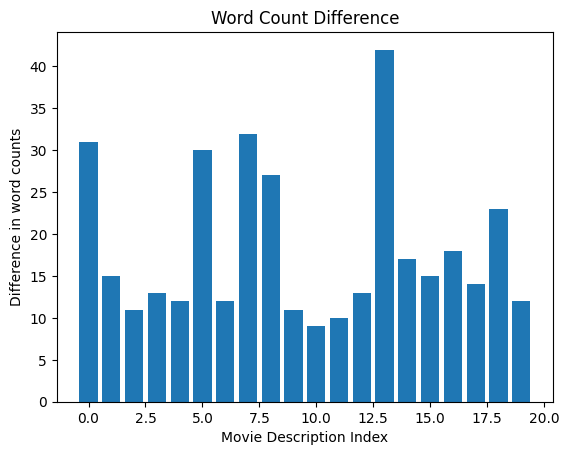

In [28]:
x = np.arange(20)

plt.title('Word Count Difference')
plt.xlabel('Movie Description Index')
plt.ylabel('Difference in word counts')
plt.bar(height=diffInLen, x=x)

plt.show()